# US School Analysis

## Start with imports and reading in your data

In [102]:
# Include all your imports here
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Load the Public school dataset
data_path = 'Resources/public_school_data.csv'
data = pd.read_csv(data_path)
data.head()

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [104]:
# Load the Public school locations dataset
locations_path = 'Resources/public_school_locations.csv'
locations = pd.read_csv(locations_path)
locations.head()

,ID,LATCOD,LONCOD
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [105]:
# Load the Public school data dictionary file
dicts_path = 'Resources/school_data_dictionary.csv'
dictionary = pd.read_csv(dicts_path)
dictionary.head()

,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,NCESSCH,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code


## Data Exploration and Preparation

In [106]:
# Use an .isin() function on dictionary to keep only fields that appear in the main public_school_data.csv and identify the unique id column 
dict2 = dictionary['Fields'].isin(data.columns)
dict2

0     False
1     False
2      True
3     False
4     False
      ...  
73    False
74    False
75     True
76    False
77    False
Name: Fields, Length: 78, dtype: bool

In [107]:
dictionary = dictionary[dict2]
dictionary

,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [108]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
data['NCESSCH'].unique



<bound method Series.unique of 0          10000500870
1          10000500871
2          10000500879
3          10000500889
4          10000501616
              ...     
100717    780003000024
100718    780003000026
100719    780003000027
100720    780003000033
100721    780003000034
Name: NCESSCH, Length: 100722, dtype: int64>

In [109]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index
data = data.rename(columns = {'NCESSCH':'SCHOOL_ID'})
dictionary.at[2, 'Fields'] = 'SCHOOL_ID'
data = data.set_index(['SCHOOL_ID'])
dictionary = dictionary.set_index(['Fields'])

In [110]:
# Check your work
data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
SCHOOL_ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [111]:
# Check your work
dictionary.head()

,Field Descriptions
Fields,
SCHOOL_ID,Unique School ID
LSTATE,Location state
SCHOOL_LEVEL,School level
SCHOOL_TYPE_TEXT,School type (description)
TOTAL,Total students all grades (includes AE)


In [112]:
locations = locations.rename(columns={'ID' : 'SCHOOL_ID'})
locations = locations.set_index(['SCHOOL_ID'])

In [113]:
# Join the location and data dataframes together
locdata = pd.concat([locations, data], axis=1)
# Using merge:
# locdata = pd.merge(locations, data, on='SCHOOL_ID', how='left')
locdata.head()

,LATCOD,LONCOD,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
SCHOOL_ID,,,,,,,,,,,,,,,
10000500870,34.2602,-86.206200,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,34.2622,-86.204900,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,34.2733,-86.220100,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,34.2527,-86.221806,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,34.2898,-86.193300,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [114]:
# Get the value counts for the school type column
locdata['SCHOOL_TYPE_TEXT'].value_counts()

Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: SCHOOL_TYPE_TEXT, dtype: int64

In [133]:
# Create a subset of the dataframe that only includes regular schools. Ensure it was successful by comparing rows in the subset to the value counts above
regular_schools = locdata[locdata['SCHOOL_TYPE_TEXT'] == 'Regular school']
regular_schools = regular_schools.rename(columns = {'LATCOD':'LAT', 'LONCOD':'LONG', 'LSTATE':'STATE', 'SCHOOL_TYPE_TEXT':'SCHOOL_TYPE', 'TOTAL':'TOTAL_STUDENTS', 'FTE':'TOTAL_TEACHERS', 'STUTERATIO':'STU_RATIO'})
regular_schools.count()

LAT               91595
LONG              91595
STATE             91595
SCHOOL_LEVEL      91595
SCHOOL_TYPE       91595
TOTAL_STUDENTS    90727
TOTAL_TEACHERS    84942
STU_RATIO         91063
AM                69437
AS                79701
BL                84536
HP                59190
HI                89338
TR                86623
WH                89227
dtype: int64

## Data Cleaning and dealing with nulls

In [134]:
# Check for nulls and determine the best approach for dealing with them
regular_schools.isnull().sum() / len(regular_schools) * 100

LAT                0.000000
LONG               0.000000
STATE              0.000000
SCHOOL_LEVEL       0.000000
SCHOOL_TYPE        0.000000
TOTAL_STUDENTS     0.947650
TOTAL_TEACHERS     7.263497
STU_RATIO          0.580818
AM                24.191277
AS                12.985425
BL                 7.706753
HP                35.378569
HI                 2.464108
TR                 5.428244
WH                 2.585294
dtype: float64

In [135]:
regular_schools.index.duplicated().sum()

0

In [136]:
# Fill some of the columns with 0 where it makes sense
regular_schools['AM'] = regular_schools['AM'].fillna(0)
regular_schools['AS'] = regular_schools['AS'].fillna(0)
regular_schools['BL'] = regular_schools['BL'].fillna(0)
regular_schools['HP'] = regular_schools['HP'].fillna(0)
regular_schools['HI'] = regular_schools['HI'].fillna(0)
regular_schools['TR'] = regular_schools['TR'].fillna(0)
regular_schools['WH'] = regular_schools['WH'].fillna(0)

In [137]:
# Verify changes to nulls and prepare to drop na
regular_schools.isnull().sum() / len(regular_schools) * 100

LAT               0.000000
LONG              0.000000
STATE             0.000000
SCHOOL_LEVEL      0.000000
SCHOOL_TYPE       0.000000
TOTAL_STUDENTS    0.947650
TOTAL_TEACHERS    7.263497
STU_RATIO         0.580818
AM                0.000000
AS                0.000000
BL                0.000000
HP                0.000000
HI                0.000000
TR                0.000000
WH                0.000000
dtype: float64

In [138]:
# Drop remaining nulls wher it would make sense
regular_schools = regular_schools.dropna()

In [139]:
# Verify changes to nulls and no nulls should remain
regular_schools.isnull().sum()

LAT               0
LONG              0
STATE             0
SCHOOL_LEVEL      0
SCHOOL_TYPE       0
TOTAL_STUDENTS    0
TOTAL_TEACHERS    0
STU_RATIO         0
AM                0
AS                0
BL                0
HP                0
HI                0
TR                0
WH                0
dtype: int64

## Plotting to help Clean the Data

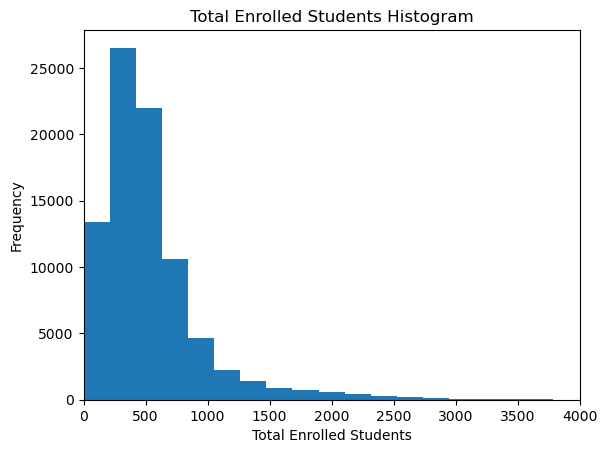

In [140]:
# Plot a histogram of Total enrolled students and check for outliers
ax = regular_schools['TOTAL_STUDENTS'].plot(kind='hist', bins=100)
ax.set_title('Total Enrolled Students Histogram')
ax.set_xlabel('Total Enrolled Students')
ax.set_ylabel('Frequency')

plt.xlim(0,4000)
plt.show()

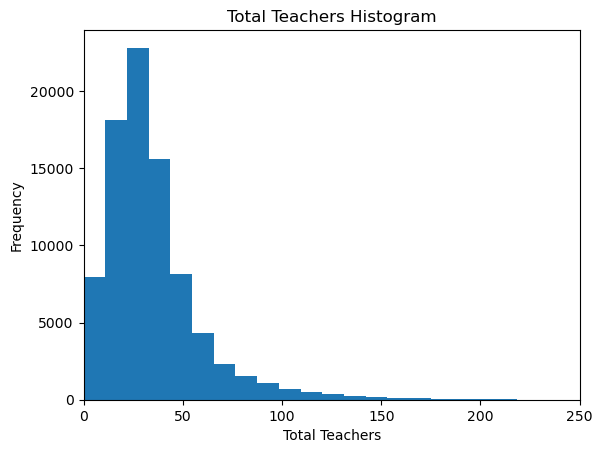

In [141]:
# Plot a histogram of Total Teachers and check for outliers
tax = regular_schools['TOTAL_TEACHERS'].plot(kind='hist', bins=100)
tax.set_title('Total Teachers Histogram')
tax.set_xlabel('Total Teachers')
tax.set_ylabel('Frequency')

plt.xlim(0, 250)
plt.show()

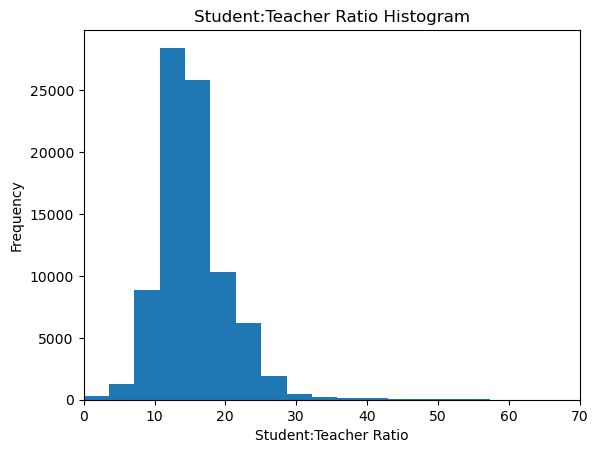

In [142]:
# Plot a histogram of Student Teacher Ratio and check for outliers
rax = regular_schools['STU_RATIO'].plot(kind='hist', bins=5000)
rax.set_title('Student:Teacher Ratio Histogram')
rax.set_xlabel('Student:Teacher Ratio')
rax.set_ylabel('Frequency')

plt.xlim(0,70)
plt.show()

In [143]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
sq99 = regular_schools['TOTAL_STUDENTS'].quantile(0.99)
total_filtered = regular_schools[(regular_schools['TOTAL_STUDENTS'] <= sq99) & (regular_schools['TOTAL_STUDENTS'] != 0)]

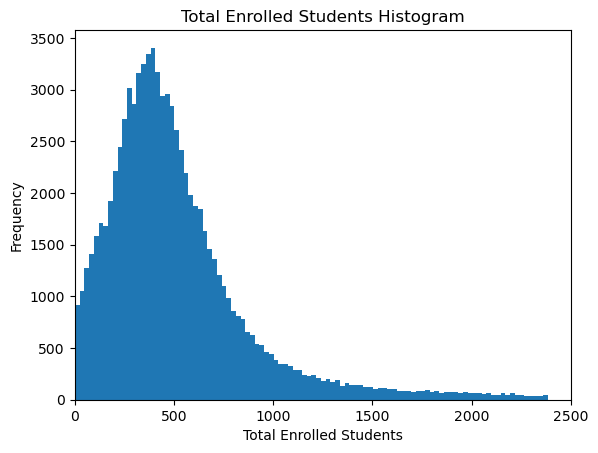

In [144]:
fax = total_filtered['TOTAL_STUDENTS'].plot(kind='hist', bins=100)
fax.set_title('Total Enrolled Students Histogram')
fax.set_xlabel('Total Enrolled Students')
fax.set_ylabel('Frequency')

plt.xlim(0,2500)
plt.show()

In [145]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile
tq99 = regular_schools['TOTAL_TEACHERS'].quantile(0.99)
teachers_filtered = regular_schools[(regular_schools['TOTAL_TEACHERS'] <= tq99) & (regular_schools['TOTAL_TEACHERS'] != 0)]

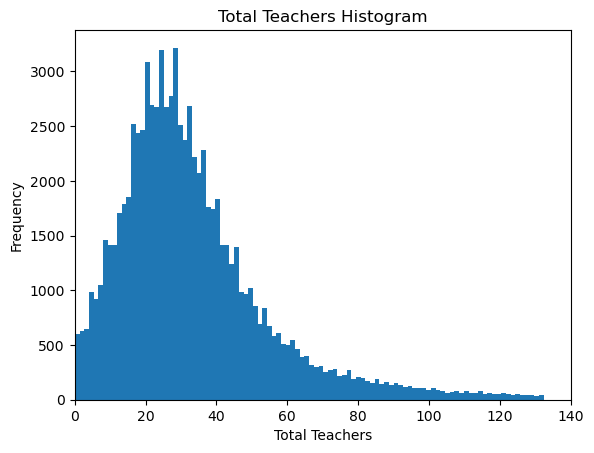

In [146]:
ftax = teachers_filtered['TOTAL_TEACHERS'].plot(kind='hist', bins=100)
ftax.set_title('Total Teachers Histogram')
ftax.set_xlabel('Total Teachers')
ftax.set_ylabel('Frequency')

plt.xlim(0, 140)
plt.show()

In [147]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
rq99 = regular_schools['STU_RATIO'].quantile(0.99)
ratio_filtered = regular_schools[(regular_schools['STU_RATIO'] <= rq99) & (regular_schools['STU_RATIO'] != 0)]

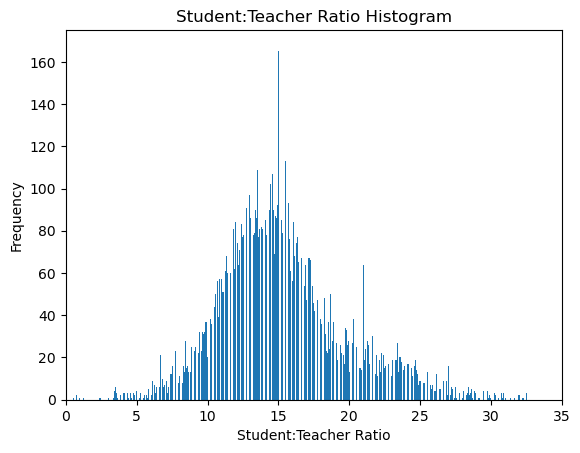

In [148]:
frax = ratio_filtered['STU_RATIO'].plot(kind='hist', bins=5000)
frax.set_title('Student:Teacher Ratio Histogram')
frax.set_xlabel('Student:Teacher Ratio')
frax.set_ylabel('Frequency')

plt.xlim(0,35)
plt.ylim(0,175)
plt.show()

## Correlation Plot to Understand Data Relationships

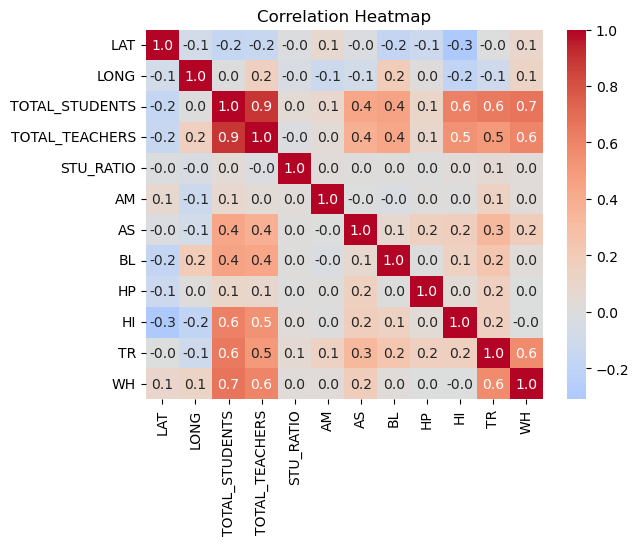

In [151]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe
# calculate the correlation matrix
correlation_matrix = regular_schools.corr()

# create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

## Geographic Plots

In [161]:
regular_schools['STATE'].unique()


array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'OR', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'UT', 'GU', 'PR', 'VI'], dtype=object)

In [164]:
nconus = ['AK', 'HI', 'GU', 'PR', 'VI']
mask = regular_schools['STATE'].isin(nconus)
conus = regular_schools[~mask]
conus['STATE'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'OR', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY', 'UT'], dtype=object)

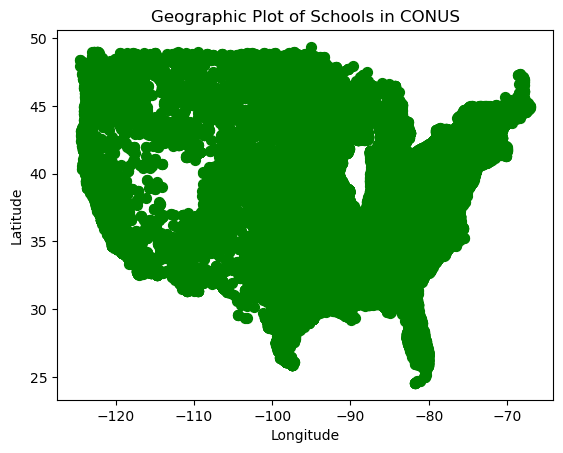

In [174]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)
conus.plot.scatter(x='LONG', y='LAT', c='green', marker='o', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Plot of Schools in CONUS')
plt.show()

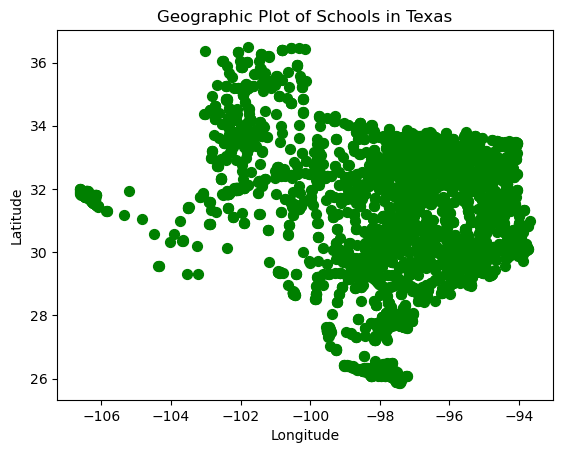

In [175]:
# Plot only schools in your state
txlist = ['TX']
mask2 = conus['STATE'].isin(txlist)
texas = conus[mask2]
texas.plot.scatter(x='LONG', y='LAT', c='green', marker='o', s=50)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Plot of Schools in Texas')
plt.show()

## School Quality Analysis: Student/Teacher Ratios

In [ ]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state



In [ ]:
# What is the mean of the Student/Teacher Ratio


In [ ]:
# What is the standard deviation of the Student/Teacher Ratio


In [ ]:
# Plot the states ratios in descending order


In [ ]:
# Plot a boxplot of the Student/Teacher Ratios


In [ ]:
# List or Plot the Highest 5 states



In [ ]:
# List or plot the lowest 5



In [ ]:
# Print your state's Student Teacher Ratios



## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [ ]:
# Your code below
